# Machine Learning Model for Predicting Selling Price of a Residential Apartment. 

Developing a machine learning model to predict the price of a residential apartment using 'real_estate.csv' dataset.

Author: Adeyinka Edu Date: 03/04/2021

In [20]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
import numpy as np
%matplotlib inline

In [4]:
data = pd.read_csv('real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


# Exploratory Data Analysis

In [5]:
data.describe()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [6]:
#Check for null values
data.isnull().sum()

transaction_date            0
house_age                   0
transit_distance            0
local_convenience_stores    0
latitude                    0
longitude                   0
price_per_unit              0
dtype: int64

house_age 
Minimum: 0.0,
Mean: 17.71256038647343, 
Medium: 16.1,
Maximum: 43.8, 
Mode: 0.0

transit_distance 
Minimum: 23.38284,
Mean: 1083.8856889130436, 
Medium: 492.2313,
Maximum: 6488.021, 
Mode: 289.3248

local_convenience_stores 
Minimum: 0,
Mean: 4.094202898550725, 
Medium: 4.0,
Maximum: 10, 
Mode: 0



<ipython-input-7-65920d00b9a2>:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-7-65920d00b9a2>:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-7-65920d00b9a2>:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


price_per_unit 
Minimum: 7.6,
Mean: 37.980193236714975, 
Medium: 38.45,
Maximum: 117.5, 
Mode: 24.7



<ipython-input-7-65920d00b9a2>:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


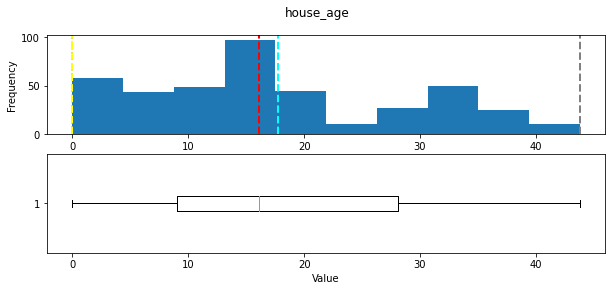

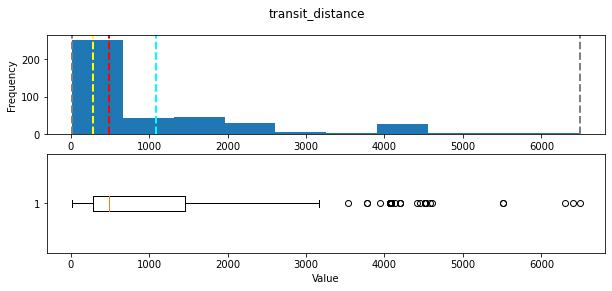

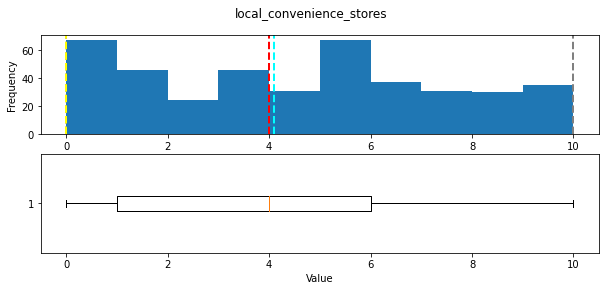

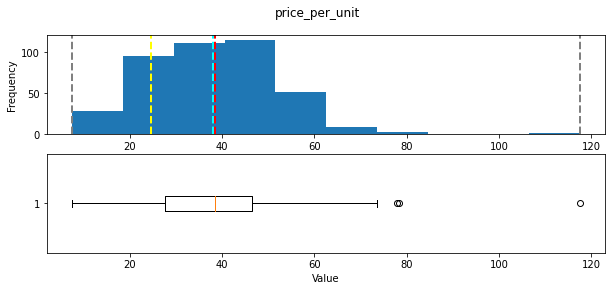

In [7]:
# Function to show summary stats and distribution for a column
def show_distribution(var_data):
    
    #Get Statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]
    
    print(var_data.name,f"\nMinimum: {min_val},\nMean: {mean_val}, \nMedium: {med_val},\nMaximum: {max_val}, \nMode: {mod_val}\n")
    
    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))
    
    #plot the histogram
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')
    
    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)
    
    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')
    
    #Add title to the Figure
    fig.suptitle(var_data.name)
    
    #show the figure
    fig.show()
    
# Call the function for each delay field
numericFields = ['house_age','transit_distance', 'local_convenience_stores', 'price_per_unit']
for col in numericFields:
    show_distribution(data[col])

In [8]:
#Remove Outliers for price_unit, transit distance based on 1% and 90% percentiles
priceUnit_01pcntile = data.price_per_unit.quantile(0.01)
priceUnit_90pcntile = data.price_per_unit.quantile(0.90)
data = data[data.price_per_unit < priceUnit_90pcntile]
data = data[data.price_per_unit > priceUnit_01pcntile]

transit_01pcntile = data.transit_distance.quantile(0.01)
transit_90pcntile = data.transit_distance.quantile(0.90)
data = data[data.transit_distance < transit_90pcntile]
data = data[data.transit_distance > transit_01pcntile]

house_age 
Minimum: 0.0,
Mean: 18.40553846153846, 
Medium: 16.4,
Maximum: 43.8, 
Mode: 0.0

transit_distance 
Minimum: 57.58945,
Mean: 800.2486670769231, 
Medium: 492.2313,
Maximum: 2707.392, 
Mode: 289.3248

local_convenience_stores 
Minimum: 0,
Mean: 4.273846153846153, 
Medium: 4.0,
Maximum: 10, 
Mode: 5



<ipython-input-7-65920d00b9a2>:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-7-65920d00b9a2>:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-7-65920d00b9a2>:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-7-65920d00b9a2>:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


price_per_unit 
Minimum: 13.7,
Mean: 37.08707692307693, 
Medium: 38.1,
Maximum: 54.8, 
Mode: 31.3



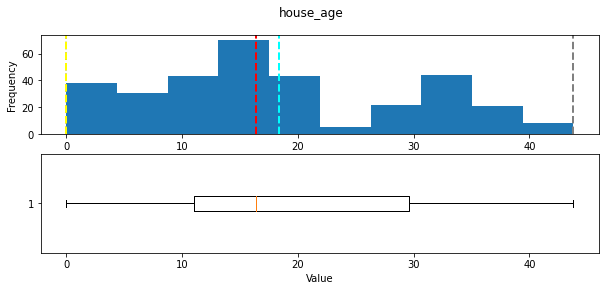

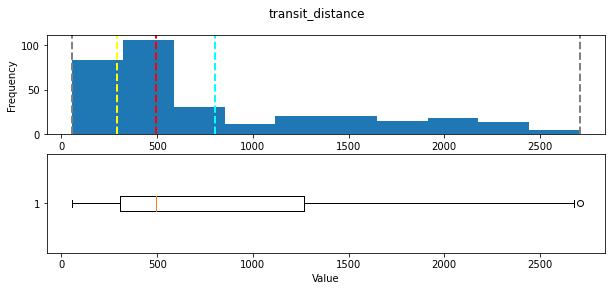

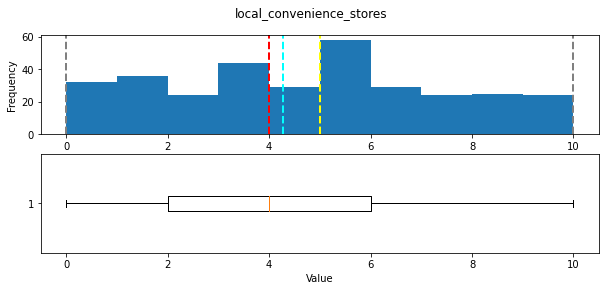

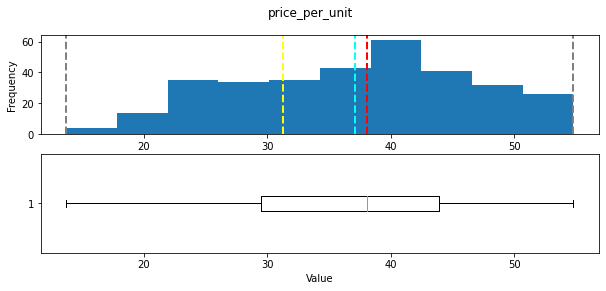

In [9]:
#View Revised distribution
for col in numericFields:
    show_distribution(data[col])

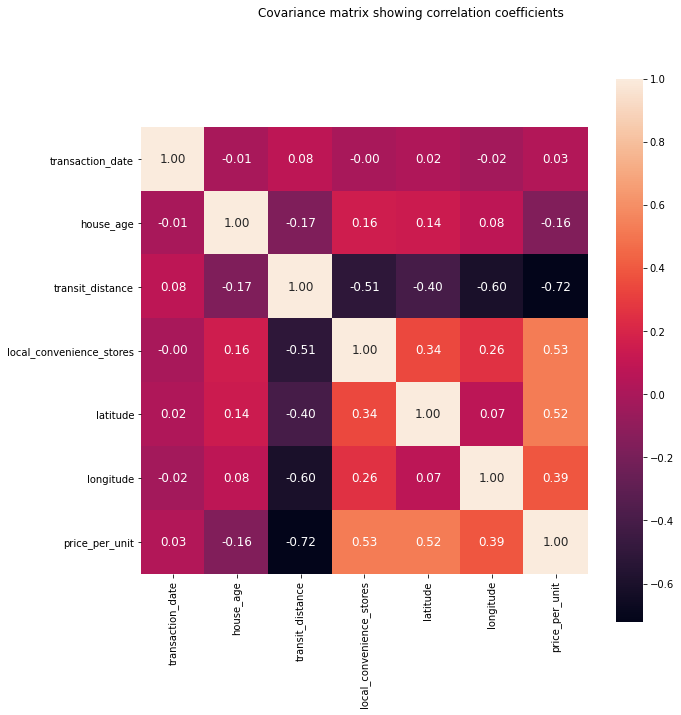

In [10]:
#View numeric correlation 
fig, ax = plt.subplots(figsize = (10,10))
fig.suptitle('Covariance matrix showing correlation coefficients')
ax = sns.heatmap(data.corr(),cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12})

# Selecting Important Features

In [11]:
cols_selected = ['transit_distance', 'local_convenience_stores', 'latitude', 'longitude', 'price_per_unit']

In [12]:
data[cols_selected].head()

,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,84.87882,10,24.98298,121.54024,37.9
1,306.59470,9,24.98034,121.53951,42.2
2,561.98450,5,24.98746,121.54391,47.3
3,561.98450,5,24.98746,121.54391,54.8
4,390.56840,5,24.97937,121.54245,43.1


In [13]:
X = data[cols_selected].iloc[:,0:4].values    # features matrix 
y = data[cols_selected]['price_per_unit'].values        # target variable

In [14]:
print(X.shape)

(325, 4)


In [15]:
print(y.shape)

(325,)


Scale features

In [16]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X = stdsc.fit_transform(X)

Data Partitioning into training and testing data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Build Multi-Regression Model

In [18]:
lr = LinearRegression()
lr.fit(X_train,y_train)

prediction = lr.predict(X_test)

Evaluation of model

MSE: 40.299064624809056
R2: 0.5771663989143736
Coefficients and intercept = [-5.61969441  1.3024311   1.76283693 -0.17823489] 37.206332899077125


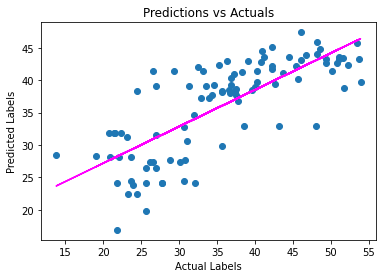

In [36]:
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

#Display metrics
mse = mean_squared_error(y_test, prediction)
print("MSE:", mse)
r2 = r2_score(y_test, prediction)
print("R2:", r2)
print("Coefficients and intercept =",lr.coef_, lr.intercept_)

# Plot predicted vs actual
plt.scatter(y_test, prediction)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, prediction, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

The model can be improved more by using different algorithms and also optimizing th ehyperparameters to get better score.

# Using Lasso 

MSE: 43.963485627604186
RMSE: 6.630496635064691
R2: 0.5387178556806482


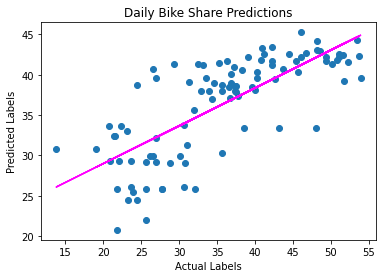

In [28]:
from sklearn.linear_model import Lasso

#Lasso Model
model = Lasso().fit(X_train, y_train)
predictions = model.predict(X_test)

#Evaluate model 
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

# Using an Ensemble Algorithm.i.e RandomForest

MSE: 28.67638718615382
RMSE: 5.35503381746127
R2: 0.6991160918265462


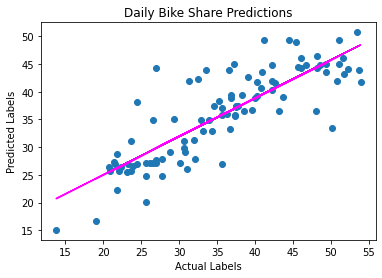

In [30]:
from sklearn.ensemble import RandomForestRegressor

#Random Forest
model = RandomForestRegressor().fit(X_train, y_train)
predictions = model.predict(X_test)

#Evaluate model 
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

For good measure, let's also try a boosting ensemble algorithm. We'll use a Gradient Boosting estimator

GradientBoostingRegressor() 

MSE: 28.546312610182547
RMSE: 5.342874938662007
R2: 0.7004808853243525


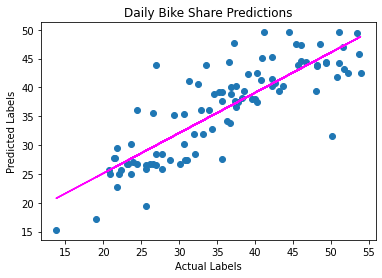

In [43]:
from sklearn.ensemble import GradientBoostingRegressor

#Gradient Boosting Algorithm
model = GradientBoostingRegressor().fit(X_train, y_train)
predictions = model.predict(X_test)

#Evaluate model 
print(model,"\n")
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

# Hyper-Parameter Tunning and Cross Validation

Using grid search approach to try combinations from a grid of possible values for the learning_rate and n_estimators hyperparameters of the GradientBoostingRegressor estimator.

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 50} 

GradientBoostingRegressor(n_estimators=50) 

MSE: 28.727472165303233
RMSE: 5.3598015042819664
R2: 0.6985800881774233


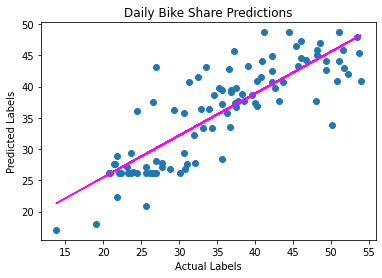

In [42]:
from sklearn.model_selection import GridSearchCV

#Using a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

#Trying different hyperparameter value
params = {
    'learning_rate': [0.1, 0.4, 0.7, 1.0],
    'n_estimators': [50, 70, 110, 150]
}

#Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=5, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

#Get Best model
model = gridsearch.best_estimator_
print(model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Observation: Tunning the hyperparameters didn't give a better R2 metric than the defualt hyperparameter so will be going with the default

In [45]:
#Gradient Boosting Algorithm
model = GradientBoostingRegressor().fit(X_train, y_train)
predictions = model.predict(X_test)

#Evaluate model 
print(model,"\n")
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

GradientBoostingRegressor() 

MSE: 28.498224682152006
RMSE: 5.338372849675452
R2: 0.7009854427369676


# Using the Trained model
Predict the price per unit for the below data

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [47]:
# An array of features for each transaction (don't include the transaction date and house age)
X_new = np.array([[289.3248,5,24.98203,121.54348],
                  [4082.015,0,24.94155,121.5038]])

stdsc = StandardScaler()
X_new = stdsc.fit_transform(X_new)

# Use the model to predict unit price
results = model.predict(X_new)
print('Predictions:')
for prediction in results:
    print(round(prediction,2))

Predictions:
48.87
25.87
